# <center> Trajectory of a particle under the action of a magnetic field </center>
<center> Trajetória de uma partícula sob ação de um campo magnético </center>

------------------------------------

## Data

Please, edit only the next cell

In [194]:
''' ==== particle features ==== '''
m = 939.3      # mass (MeV/c²)
q = 1          # charge


''' ==== initial conditions ==== '''
x0, y0, z0 = -0.05, 0, 0     # initial position (m)
v_direction = [1, 0, 0]
Ec0 = 1        # initial kinetic energy (MeV)


''' ==== time conditions ==== '''
step = 1e-11      # time step (used for RK4)
total_t = 1e-7    # total elapsed time (s)


''' ==== loading data ==== '''
file_name = "2017-03-06_BD-004_Model09_Hall_I=991.63A.dat"      # file containing the data to be uploaded
magnet_name = "BD-004"
magnet_type = "dipole"
magnet_length = 1206
traj_distance = 0.25


''' ==== saving data ==== '''
output_file = True 
txt_name = "2017-03-06_BD-004_teste"


''' ==== graphic visualization ==== '''
output_graphic = True

## Imports

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.interpolate import RegularGridInterpolator
from datetime import datetime
import math
from IPython.display import display

## Main

In [196]:
# defines the eletric field at each point
def e_field(x, y, z): 
      Ex = 1
      Ey = 0
      Ez = 0
      return Ex, Ey, Ez


 # creates the interpolator
def create_interpolators(df):
    x_vals = np.sort(pd.to_numeric(df["x_mm"]).unique())
    y_vals = np.sort(df["y_mm"].unique())
    z_vals = np.sort(pd.to_numeric(df["z_mm"]).unique())


    xg, yg ,zg = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij', sparse=True)


    nx, ny, nz = len(x_vals), len(y_vals), len(z_vals)

    fbx_grid = df['Bx_T'].values.reshape(nx, ny, nz)
    fby_grid = df['By_T'].values.reshape(nx, ny, nz)
    fbz_grid = df['Bz_T'].values.reshape(nx, ny, nz)


    fbx = RegularGridInterpolator((x_vals, y_vals, z_vals), fbx_grid, bounds_error=False, fill_value=0)
    fby = RegularGridInterpolator((x_vals, y_vals, z_vals), fby_grid, bounds_error=False, fill_value=0)
    fbz = RegularGridInterpolator((x_vals, y_vals, z_vals), fbz_grid, bounds_error=False, fill_value=0)
    
    return {
        'Bx': fbx,
        'By': fby,
        'Bz': fbz,
    }


# defines the magnetic field at each point
def b_field(x, y, z, interp_data):
    x_mm = x * 1000
    y_mm = y * 1000
    z_mm = z * 1000
    
    point = np.array([x_mm, y_mm, z_mm], dtype=float)


    Bx = float(interp_data['Bx'](point))
    By = float(interp_data['By'](point))
    Bz = float(interp_data['Bz'](point))
    
    return Bx, By, Bz



In [ ]:
  # creates the interpolator
def create_interpolators(df):
    x_vals = np.sort(pd.to_numeric(df["x_mm"]).unique())
    y_vals = np.sort(df["y_mm"].unique())
    z_vals = np.sort(pd.to_numeric(df["z_mm"]).unique())


    xg, yg ,zg = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij', sparse=True)


    nx, ny, nz = len(x_vals), len(y_vals), len(z_vals)

    fbx_grid = df['Bx_T'].values.reshape(nx, ny, nz)
    fby_grid = df['By_T'].values.reshape(nx, ny, nz)
    fbz_grid = df['Bz_T'].values.reshape(nx, ny, nz)


    fbx = RegularGridInterpolator((x_vals, y_vals, z_vals), fbx_grid, bounds_error=False, fill_value=0)
    fby = RegularGridInterpolator((x_vals, y_vals, z_vals), fby_grid, bounds_error=False, fill_value=0)
    fbz = RegularGridInterpolator((x_vals, y_vals, z_vals), fbz_grid, bounds_error=False, fill_value=0)
    
    return {
        'Bx': fbx,
        'By': fby,
        'Bz': fbz,
    }

# defines the magnetic field at each point
def b_field(x, y, z, interp_data):
    x_mm = x * 1000
    y_mm = y * 1000
    z_mm = z * 1000
    
    point = np.array([x_mm, y_mm, z_mm], dtype=float)


    Bx = float(interp_data['Bx'](point))
    By = float(interp_data['By'](point))
    Bz = float(interp_data['Bz'](point))
    
    return Bx, By, Bz



def main_func(m, q, x0, y0, z0, b_field, e_field, Ec0, v_direction, step, total_t, output_file, txt_name, file_name, magnet_name, magnet_type, magnet_length, traj_distance):

    # define some physical constants
    c = 2.99792458e8      # light speed (m/s)

    conv_m = m * 1.78266e-30      # converted mass (Kg)
    conv_q = q * 1.60218e-19        # converted charge (C)
    const = conv_q/conv_m

    gamma = 1.0 + (Ec0 / m)

    conv_v = (np.sqrt(1.0 - 1.0/(gamma**2))) * c  # converted speed (m/s)


    # convert and normalize velocity direction
    ux = v_direction[0]
    uy = v_direction[1]
    uz = v_direction[2]
    u = np.array([ux, uy, uz], dtype=float)
    u_hat = u / np.linalg.norm(u)
    Vx, Vy, Vz = conv_v * u_hat          # x, y and z velocitys (m/s)


    x, y, z = x0, y0, z0       # initial position


    # data import
    df = pd.read_csv(file_name, 
                     sep="\t", 
                     skiprows=15)
    
    # some adjusts
    df.drop(index=[0], inplace=True)
    df = df.dropna(axis=1)
    df = df.set_axis(["x_mm", "y_mm", "z_mm", "Bx_T", "By_T", "Bz_T"], axis=1)
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna()

    # calls the interpolator function
    interp_data = create_interpolators(df)


    # instant acceleration function
    def acceleration(x, y, z, Vx, Vy, Vz):
        Bx, By, Bz = b_field(x, y, z, interp_data)
        Ex, Ey, Ez = e_field(x, y, z)

        V2 = Vx**2 + Vy**2 + Vz**2           # squared velocity

        if V2 >= c**2:
            gamma = 1.0e10 
        else:
            gamma = 1.0 / np.sqrt(1.0 - V2/c**2)
    
        ax2 = const/gamma*((Ex+Vy*Bz-Vz*By)-((Vx/c**2)*Vx*Ex+Vy*Ey+Vz*Ez))
        ay2 = const/gamma*((Ey+Vz*Bx-Vx*Bz)-((Vy/c**2)*Vx*Ex+Vy*Ey+Vz*Ez))
        az2 = const/gamma*((Ez+Vx*By-Vy*Bx)-((Vz/c**2)*Vx*Ex+Vy*Ey+Vz*Ez))
        
        return ax2, ay2, az2
    

    # Runge-Kutta 4th order method
    def rk4(x, y, z, Vx, Vy, Vz, step): 
        # k1
        ax1, ay1, az1 = acceleration(x, y, z, Vx, Vy, Vz)
        k1_x = Vx        
        k1_y = Vy        
        k1_z = Vz         
        k1_Vx = ax1     
        k1_Vy = ay1      
        k1_Vz = az1        
    
        # k2 
        x2 = x + 0.5*step * k1_x
        y2 = y + 0.5*step * k1_y
        z2 = z + 0.5*step * k1_z
        Vx2 = Vx + 0.5*step * k1_Vx
        Vy2 = Vy + 0.5*step * k1_Vy
        Vz2 = Vz + 0.5*step * k1_Vz
    
        ax2, ay2, az2 = acceleration(x2, y2, z2, Vx2, Vy2, Vz2)
        k2_x = Vx2   
        k2_y = Vy2
        k2_z = Vz2
        k2_Vx = ax2
        k2_Vy = ay2
        k2_Vz = az2
    
        # k3 
        x3 = x + 0.5*step * k2_x
        y3 = y + 0.5*step * k2_y
        z3 = z + 0.5*step * k2_z
        Vx3 = Vx + 0.5*step * k2_Vx
        Vy3 = Vy + 0.5*step * k2_Vy
        Vz3 = Vz + 0.5*step * k2_Vz
    
        ax3, ay3, az3 = acceleration(x3, y3, z3, Vx3, Vy3, Vz3)
        k3_x = Vx3
        k3_y = Vy3
        k3_z = Vz3
        k3_Vx = ax3
        k3_Vy = ay3
        k3_Vz = az3
    
        # k4
        x4 = x + step * k3_x
        y4 = y + step * k3_y
        z4 = z + step * k3_z
        Vx4 = Vx + step * k3_Vx
        Vy4 = Vy + step * k3_Vy
        Vz4 = Vz + step * k3_Vz
    
        ax4, ay4, az4 = acceleration(x4, y4, z4, Vx4, Vy4, Vz4)
        k4_x = Vx4
        k4_y = Vy4
        k4_z = Vz4
        k4_Vx = ax4
        k4_Vy = ay4
        k4_Vz = az4
    
        # general solution
        new_x = x + (step/6.0) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        new_y = y + (step/6.0) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        new_z = z + (step/6.0) * (k1_z + 2*k2_z + 2*k3_z + k4_z)
        new_Vx = Vx + (step/6.0) * (k1_Vx + 2*k2_Vx + 2*k3_Vx + k4_Vx)
        new_Vy = Vy + (step/6.0) * (k1_Vy + 2*k2_Vy + 2*k3_Vy + k4_Vy)
        new_Vz = Vz + (step/6.0) * (k1_Vz + 2*k2_Vz + 2*k3_Vz + k4_Vz)
    
        return new_x, new_y, new_z, new_Vx, new_Vy, new_Vz
    


    # define arrays to store the results
    x_vals = np.zeros(int(total_t/step))
    y_vals = np.zeros(int(total_t/step))
    z_vals = np.zeros(int(total_t/step))
    Vx_vals = np.zeros(int(total_t/step))
    Vy_vals = np.zeros(int(total_t/step))
    Vz_vals = np.zeros(int(total_t/step))
    t_vals = np.zeros(int(total_t/step))


    # main loop
    for i in range(int(total_t/step)):
        x_vals[i], y_vals[i], z_vals[i] = x, y, z
        Vx_vals[i], Vy_vals[i], Vz_vals[i] = Vx, Vy, Vz
        t_vals[i] = i*step
    
        x, y, z, Vx, Vy, Vz = rk4(x, y, z, Vx, Vy, Vz, step)

    # combine data into a single array
    data = np.column_stack((x_vals, y_vals, z_vals, Vx_vals, Vy_vals, Vz_vals, t_vals))


    # remove data beyond the specified trajectory distance
    data = np.delete(data, np.where(data[:,0]>traj_distance), axis=0)



    # save data to file
    if output_file == True:
        df_save = pd.DataFrame(data, columns=['x(m)', 'y(m)', 'z(m)', 'Vx(m/s)', 'Vy(m/s)', 'Vz(m/s)', 't(s)'])
        df_save.to_csv(f"{txt_name}.csv", index=False, float_format='%.12e')
        simulation_params = {
        'magnet_name': f'{magnet_name}',
        'timestamp': datetime.now().strftime('%Y-%m-%d_%H-%M-%S'),
        'filename': f'{txt_name}',
        'magnet_type': f'{magnet_type}',
        '': '',
        'magnet_length[mm]': f'{magnet_length}',
        'distance traveled[m]': f'{traj_distance}',
        '': '', 
        'particle_mass[MeV/c²]': f'{m}',
        'particle_charge[e]': f'{q}',
        'initial_kinetic_energy[MeV]': f'{Ec0}',
        'initial_position[m]': f'({x0}, {y0}, {z0})',
        'initial_velocity_direction': f'{v_direction}',
        'initial_speed[m/s]': f'{conv_v:.6e}',
        'time_step[s]': f'{step:.3e}',
        'total_time[s]': f'{total_t:.3e}',
        'number_of_steps': f'{total_t/step:.3e}',
        '': '',
        'Data columns': 'x(m), y(m), z(m), Vx(m/s), Vy(m/s), Vz(m/s), t(s)'
        }
        header_lines = []
        for key, value in simulation_params.items():
            if key == '':
               header_lines.append('')
            elif key == 'Data columns':
                header_lines.append(f'{value}')
            else:
             header_lines.append(f'{key}: {value}')
        header_str = '\n'.join(header_lines)
        np.savetxt(f"{txt_name}.txt", data, 
                fmt='%.12e', delimiter=',', 
                header=header_str,
                 comments='# ',
                 encoding='utf-8')
        


    # plot the results
    if output_graphic == True:
        fig = plt.figure(figsize=(15, 15))

        ax1 = fig.add_subplot(321) 
        ax2 = fig.add_subplot(322) 

        tempo = np.linspace(0, total_t, len(df_save))

        ax1.plot(df_save['x(m)'], df_save['y(m)'], 'palevioletred', linewidth=1.5)
        ax1.set_xlabel('X (m)')
        ax1.set_ylabel('Y (m)')
        ax1.grid(True)
        ax1.set_xlim(min(df_save['x(m)'])*1.1, max(df_save['x(m)'])*1.1)
        ax1.set_ylim(min(df_save['x(m)'])*1.1, max(df_save['x(m)'])*1.1)
        ax1.axis()
        ax1.set_title('XY trajectory')

        ax2.plot(df_save['z(m)'], tempo, 'teal', linewidth=1.5)
        ax2.set_xlabel('Z (m)')
        ax2.set_ylabel('Tempo')
        ax2.grid(True)
        ax2.set_xlim(min(df_save['z(m)'])*1.1, max(df_save['z(m)'])*1.1)
        ax2.set_ylim(0, total_t)
        ax2.set_title('Z trajectory')
        plt.tight_layout()
        plt.show()



        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=df_save['x(m)'],
            y=df_save['y(m)'],
            z=df_save['z(m)'],
            mode='markers'
        ))
        # set axis ranges properly using axis dicts and df_save columns
        fig.update_layout(
            title='3D Trajectory',
            scene=dict(
                xaxis=dict(title='x (m)', range=[float(df_save['x(m)'].iloc[0]), float(df_save['x(m)'].iloc[-1])]),
                yaxis=dict(title='y (m)', range=[float(df_save['x(m)'].iloc[0]), float(df_save['x(m)'].iloc[-1])]),
                zaxis=dict(title='z (m)', range=[float(df_save['x(m)'].iloc[0]), float(df_save['x(m)'].iloc[-1])]),
                camera=dict(
                    eye=dict(x=1.5, y=1.5, z=1.5)
                )
            ),
            width=800,
            height=600,
            margin=dict(r=20, l=10, b=10, t=40)
        )
        fig.show()



    # calculte the deviation degree
    x_list = np.sort(df_save["x(m)"])
    dist_x = x_list[-1] - x_list[0]

    angle = math.atan(x_list[0]/dist_x)
    degree_angle = math.degrees(angle)
    print(f'The deviation degree is approximately {degree_angle:.2f}°')
        

In [198]:

    '''fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=df['x_mm'],
            y=df['y_mm'],
            z=df['z_mm'],
            mode='markers',
            marker=dict(
                size=5,
                color=df["Bx_T"], 
                colorscale='tealrose',
                opacity=0.8,
                colorbar=dict(title='Bx(T)')
            )
        ))
        fig.update_layout(
            title='X-axis magnetic field',
            scene=dict(
                xaxis_title='x (m)',
                yaxis_title='y (m)',
                zaxis_title='z (m)',
                camera=dict(
                    eye=dict(x=1.5, y=1.5, z=1.5)
                )
            ),
            width=800,
            height=600,
            margin=dict(r=20, l=10, b=10, t=40)
        )
        fig.show()

        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=df['x_mm'],
            y=df['y_mm'],
            z=df['z_mm'],
            mode='markers',
            marker=dict(
                size=5,
                color=df["By_T"], 
                colorscale='tealrose',
                opacity=0.8,
                colorbar=dict(title='By(T)')
            )
        ))
        fig.update_layout(
            title='Y-axis magnetic field',
            scene=dict(
                xaxis_title='x (m)',
                yaxis_title='y (m)',
                zaxis_title='z (m)',
                camera=dict(
                    eye=dict(x=1.5, y=1.5, z=1.5)
                )
            ),
            width=800,
            height=600,
            margin=dict(r=20, l=10, b=10, t=40)
        )
        fig.show()


        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=df['x_mm'],
            y=df['y_mm'],
            z=df['z_mm'],
            mode='markers',
            marker=dict(
                size=5,
                color=df["Bz_T"], 
                colorscale='tealrose',
                opacity=0.8,
                colorbar=dict(title='Bz(T)')
            )
        ))
        fig.update_layout(
            title='Z-axis magnetic field',
            scene=dict(
                xaxis_title='x (m)',
                yaxis_title='y (m)',
                zaxis_title='z (m)',
                camera=dict(
                    eye=dict(x=1.5, y=1.5, z=1.5)
                )
            ),
            width=800,
            height=600,
            margin=dict(r=20, l=10, b=10, t=40)
        )
        fig.show()'''
        

'fig = go.Figure()\n    fig.add_trace(go.Scatter3d(\n        x=df[\'x_mm\'],\n        y=df[\'y_mm\'],\n        z=df[\'z_mm\'],\n        mode=\'markers\',\n        marker=dict(\n            size=5,\n            color=df["Bx_T"], \n            colorscale=\'tealrose\',\n            opacity=0.8,\n            colorbar=dict(title=\'Bx(T)\')\n        )\n    ))\n    fig.update_layout(\n        title=\'X-axis magnetic field\',\n        scene=dict(\n            xaxis_title=\'x (m)\',\n            yaxis_title=\'y (m)\',\n            zaxis_title=\'z (m)\',\n            camera=dict(\n                eye=dict(x=1.5, y=1.5, z=1.5)\n            )\n        ),\n        width=800,\n        height=600,\n        margin=dict(r=20, l=10, b=10, t=40)\n    )\n    fig.show()\n\n    fig = go.Figure()\n    fig.add_trace(go.Scatter3d(\n        x=df[\'x_mm\'],\n        y=df[\'y_mm\'],\n        z=df[\'z_mm\'],\n        mode=\'markers\',\n        marker=dict(\n            size=5,\n            color=df["By_T"], \n    

C:\Users\luiza25030\AppData\Local\Temp\ipykernel_7876\178598734.py:37: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\luiza25030\AppData\Local\Temp\ipykernel_7876\178598734.py:38: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\luiza25030\AppData\Local\Temp\ipykernel_7876\178598734.py:39: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



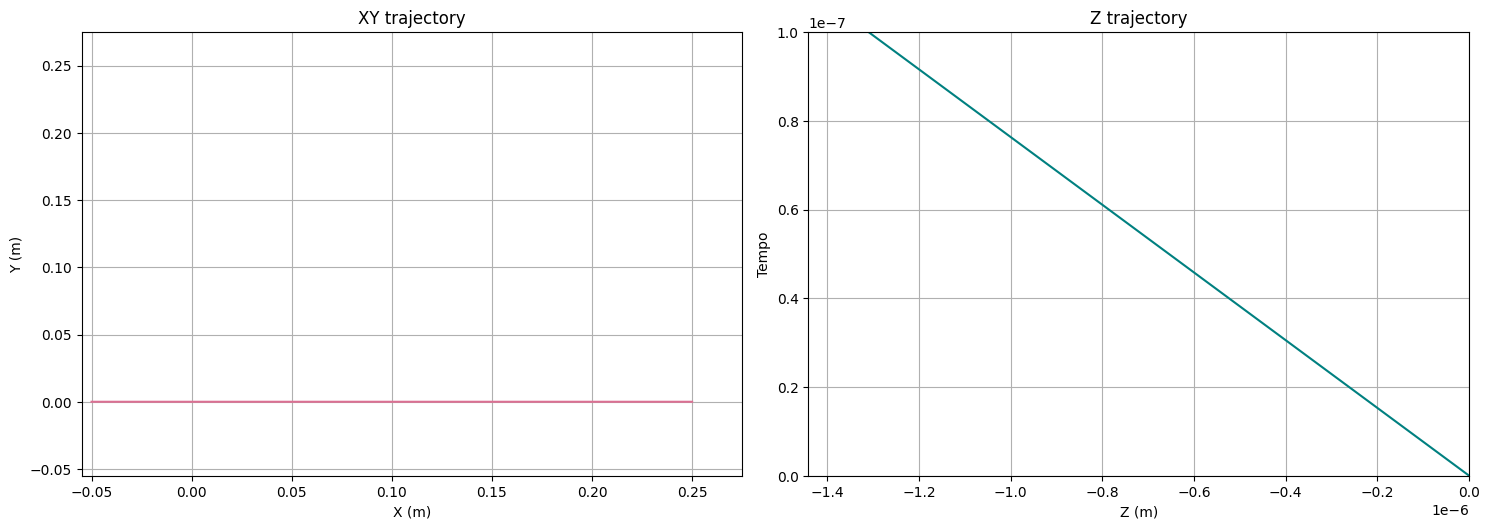

The deviation degree is approximately -9.46°


In [199]:
main_func(m, q, x0, y0, z0, b_field, e_field, Ec0, v_direction, step, total_t, output_file, txt_name, file_name, magnet_name, magnet_type, magnet_length, traj_distance)

Melhorias e dúvidas
- remover o desvio em y